In [87]:
import math
import random
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [97]:
# Cleaning dataset and Generating random labels (either 0 or 1)
data = pd.read_csv('/kaggle/input/cloudx/cloud.data', header = None)
data.columns = ['data']
data['label'] = 0

for i in range(len(data)):
    data['data'].iat[i] = re.sub(r'\s+', ' ', data['data'].iat[i])
    data['data'].iat[i] = data['data'].iat[i].strip()
    data['label'].iat[i] = round(random.random())

data[['mean', 'max', 'min', 'mean distribution', 'contrast', 'entropy', 'second angular momentum', 'meanIR', 'maxIR', 'minIR']] = data.data.str.split(" ", expand = True)
data = data.drop(labels = 'data', axis = 1)
data = data.dropna()
data = data.astype(float)
data

,label,mean,max,min,mean distribution,contrast,entropy,second angular momentum,meanIR,maxIR,minIR
0,0.0,3.0000,140.0000,43.5000,0.0833,862.8417,0.0254,3.8890,163.0000,240.0000,213.3555
1,0.0,3.0000,135.0000,41.9063,0.0790,690.3291,0.0259,3.8340,167.0000,239.0000,213.7188
2,0.0,2.0000,126.0000,21.0586,0.0406,308.3583,0.0684,3.1702,174.0000,240.0000,227.5859
3,0.0,4.0000,197.0000,77.4805,0.0890,874.4709,0.0243,3.9442,155.0000,239.0000,197.2773
4,1.0,7.0000,193.0000,88.8398,0.0884,810.1126,0.0223,3.9318,150.0000,236.0000,186.0195
...,...,...,...,...,...,...,...,...,...,...,...
2043,1.0,6.0048,57.3856,23.0036,5.1917,48.4833,0.0828,2.6890,-24.0380,33.7879,19.0423
2044,0.0,5.3599,48.1413,13.9600,1.5125,9.3375,0.3567,1.5600,-78.0507,35.0668,14.7995
2045,1.0,7.9397,48.7863,20.7169,1.7500,7.8167,0.2291,1.7824,-79.7594,30.7739,-11.1662
2046,1.0,6.6498,61.2553,23.0195,4.6750,49.2167,0.1089,2.5540,-71.8420,29.9047,0.7110


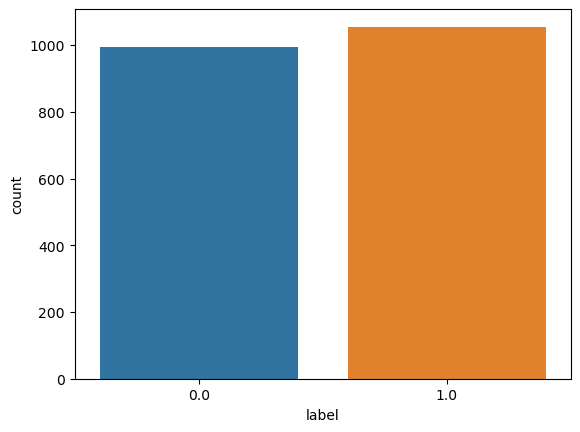

In [77]:
sns.countplot(x = data.label)
Y = data['label']
X = data.drop(['label'], axis = 1)


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2048, test_size = 0.3)

In [79]:
# Expert - 1 (XGBoost Classifier)
exp_1 = XGBClassifier()
exp_1.fit(X_train, Y_train)

# Expert - 2 (Logistic Regression)
exp_2 = LogisticRegression(max_iter = 10000)
exp_2.fit(X_train, Y_train)

# Expert - 3 (Random Forest Classifier)
exp_3 = RandomForestClassifier()
exp_3.fit(X_train,Y_train)

# Expert - 4 (Support Vector Classifier)
exp_4 = SVC()
exp_4.fit(X_train,Y_train)

# Expert - 5 (KNN Classifier)
exp_5 = KNeighborsClassifier(n_neighbors = 1)
exp_5.fit(X_train,Y_train)

# Expert - 6 (Decision Tree Classifier)
exp_6 = DecisionTreeClassifier()
exp_6.fit(X_train,Y_train)

DecisionTreeClassifier()

In [80]:
pred_1 = exp_1.predict(X_test)
pred_2 = exp_2.predict(X_test)
pred_3 = exp_3.predict(X_test)
pred_4 = exp_4.predict(X_test)
pred_5 = exp_5.predict(X_test)
pred_6 = exp_6.predict(X_test)

accuracy_1 = accuracy_score(Y_test,pred_1)
accuracy_2 = accuracy_score(Y_test,pred_2)
accuracy_3 = accuracy_score(Y_test,pred_3)
accuracy_4 = accuracy_score(Y_test,pred_4)
accuracy_5 = accuracy_score(Y_test,pred_5)
accuracy_6 = accuracy_score(Y_test,pred_6)

print("XGBoost: ", accuracy_1)
print("Logistic: ", accuracy_2)
print("Random Forest: ", accuracy_3)
print("SVC: ", accuracy_4)
print("KNN: ", accuracy_5)
print("Decision Tree: ", accuracy_6)

XGBoost:  0.5284552845528455
Logistic:  0.5008130081300813
Random Forest:  0.5382113821138211
SVC:  0.5056910569105691
KNN:  0.5284552845528455
Decision Tree:  0.5317073170731708


(615, 10)

In [83]:
# Static Expert Algorithm

# Define the learning rate and number of iterations
eta = 0.3 # Learning Rate
T = 615 # No. of iterations
R = 5 # Large constant

# Initialize the expert weights, learner loss and expert loss
weights = np.array([1/6] * 6)
loss_learner = []
loss_experts = [[] for i in range(6)]
weight_experts = [[] for i in range(6)]

# Run the static expert algorithm
for t in range(T):
    
    # Predict the labels for each expert and calculate their loss
    test_df = pd.DataFrame(data = X_test.iloc[t:t+1])
    prediction_1 = exp_1.predict(test_df)
    prediction_2 = exp_2.predict(test_df)
    prediction_3 = exp_3.predict(test_df)
    prediction_4 = exp_4.predict(test_df)
    prediction_5 = exp_5.predict(test_df)
    prediction_6 = exp_6.predict(test_df)
    
    y_hat = np.array([prediction_1[0], prediction_2[0], prediction_3[0], prediction_4[0], prediction_5[0], prediction_6[0]])
    y_temp = np.array(Y_test.iloc[t:t+1])
    y_true = np.empty(6) 
    y_true.fill(y_temp[0])
    
    experts_losses = (1/R) * np.abs(y_true - y_hat)
    learner_losses = (1/R) * abs(y_true[0] - sum(np.multiply(weights, y_hat)))

    # Update and normalize the expert weights
    weights *= np.exp(-eta * experts_losses)
    weights /= np.sum(weights)
    
    # Update the learner loss, expert losses and evolution of weights
    loss_learner.append(learner_losses)
    
    for i in range(6):
        loss_experts[i].append(experts_losses[i])
        weight_experts[i].append(weights[i])
               
cum_loss_expert = []

for i in range(6):
    cum_loss_expert.append(np.cumsum(loss_experts[i]))

cum_loss_learner = np.cumsum(loss_learner)

# Print the results
print("Expert weights:", weights)

Expert weights: [0.18680654 0.06736149 0.2677553  0.08064635 0.18680654 0.21062378]


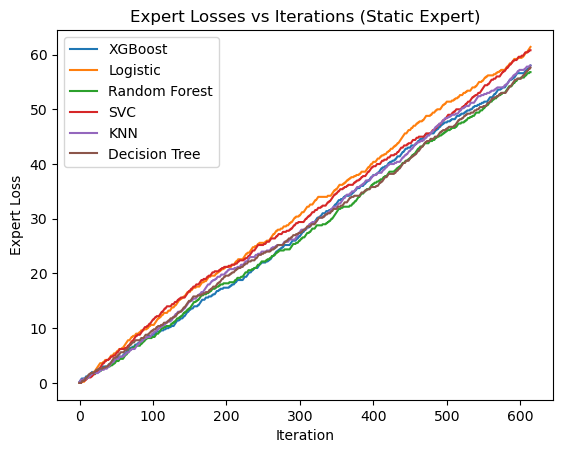

In [88]:
expert_names = ['XGBoost', 'Logistic', 'Random Forest', 'SVC', 'KNN', 'Decision Tree']

for i in range(6):
    plt.plot(range(T), cum_loss_expert[i], label = expert_names[i])
plt.title("Expert Losses vs Iterations (Static Expert)")
plt.xlabel("Iteration")
plt.ylabel("Expert Loss")
plt.legend()
plt.show()

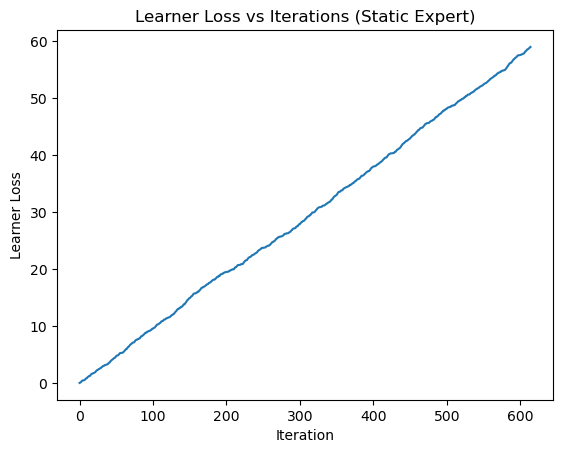

In [89]:
plt.plot(range(T), cum_loss_learner)
plt.title("Learner Loss vs Iterations (Static Expert)")
plt.xlabel("Iteration")
plt.ylabel("Learner Loss")
plt.show()

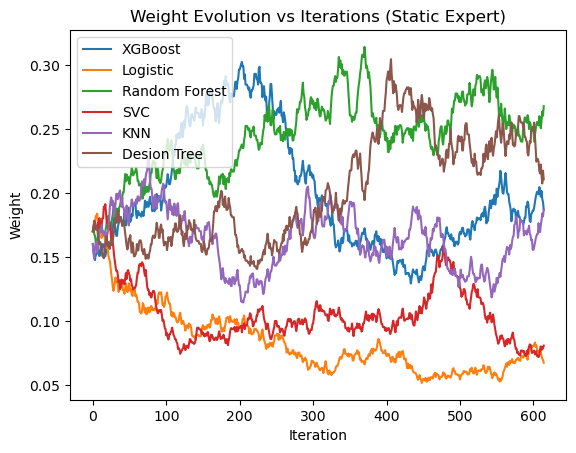

In [90]:
expert_names = ['XGBoost', 'Logistic', 'Random Forest', 'SVC', 'KNN', 'Desion Tree']

for i in range(6):
    plt.plot(range(T), weight_experts[i], label = expert_names[i])
plt.title("Weight Evolution vs Iterations (Static Expert)")
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.legend()
plt.show()

Expert weights (alpha = 0.25): [0.15888703 0.15075151 0.17976448 0.17783364 0.179206   0.15355735]


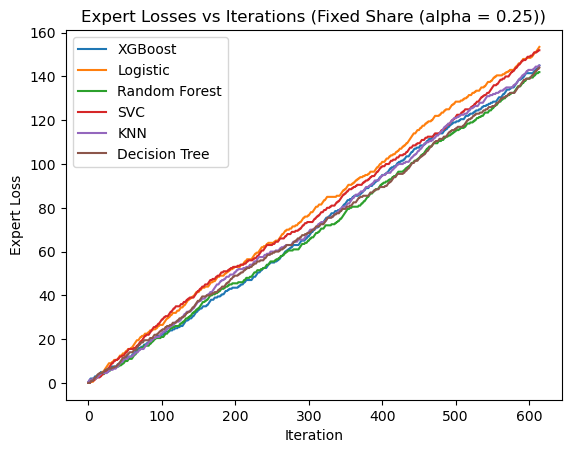

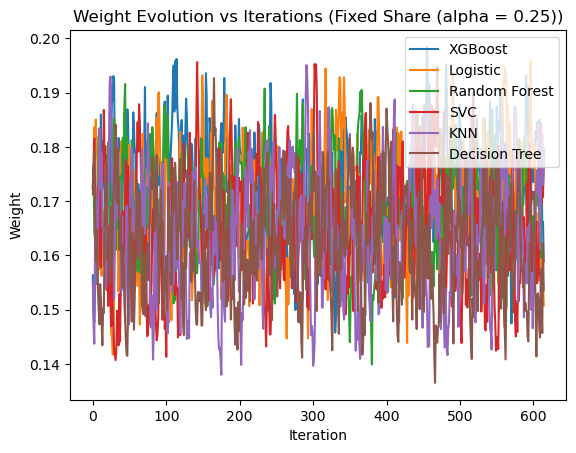

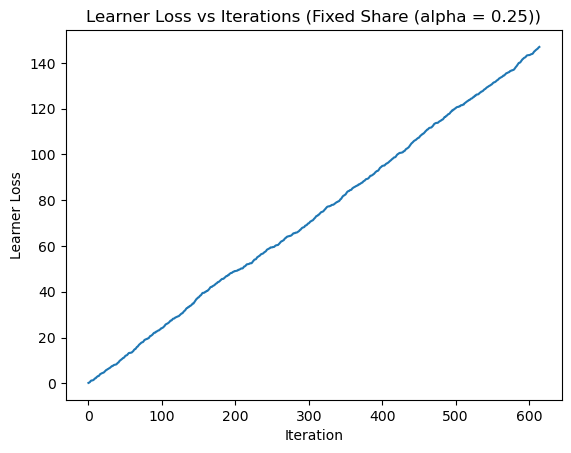

Expert weights (alpha = 0.5): [0.16773835 0.1639585  0.17356285 0.17014793 0.16782692 0.15676544]


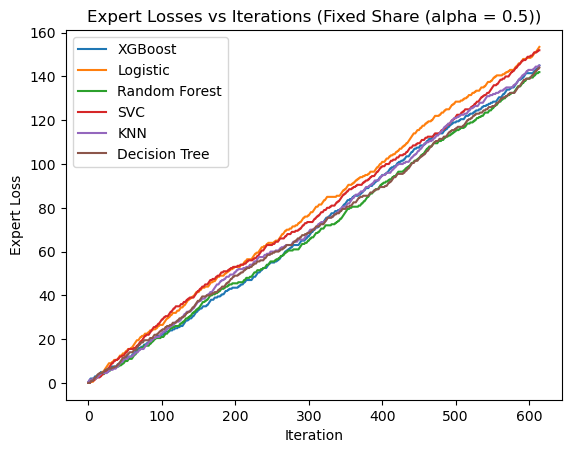

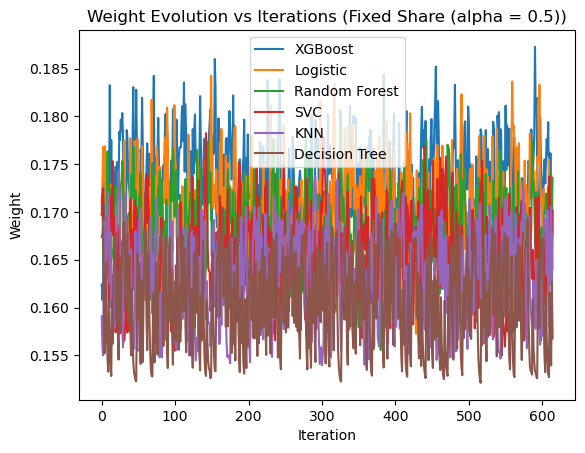

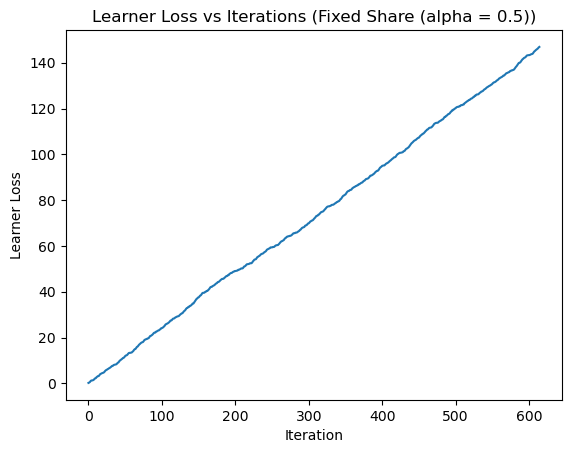

Expert weights (alpha = 0.75): [0.174332   0.17054851 0.16961539 0.16589833 0.16246609 0.15713967]


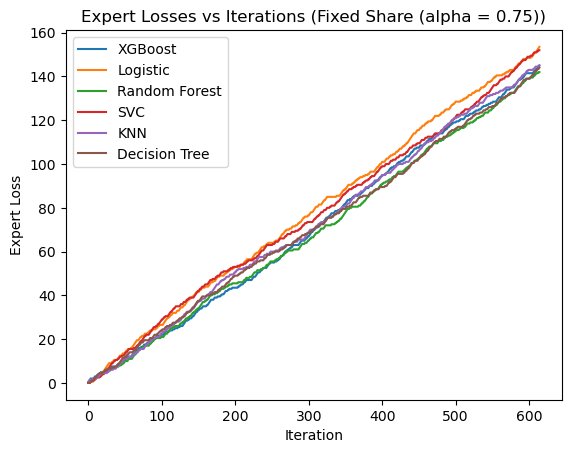

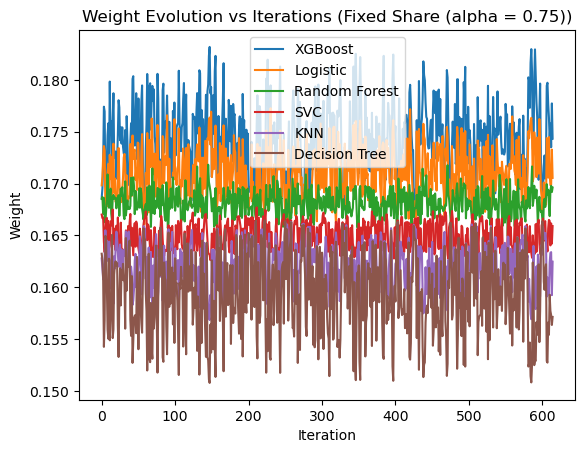

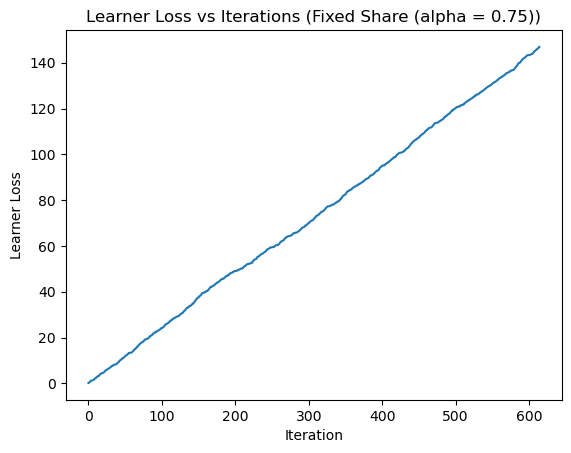

In [100]:
# Fixed share (alpha) Algorithm

def fixed_share(alpha):
    
    # Define the learning rate and number of iterations
    eta = 0.3 # Learning Rate
    T = 615 # No. of iterations
    R = 2 # Large constant

    # Initialize the expert weights, learner loss and expert loss
    weights = np.array([1/6] * 6)
    loss_learner = []
    loss_experts = [[] for i in range(6)]
    weight_experts = [[] for i in range(6)]

    # Run the static expert algorithm
    for t in range(T):
        
        # Predict the labels for each expert and calculate their loss
        test_df = pd.DataFrame(data = X_test.iloc[t:t+1])
        prediction_1 = exp_1.predict(test_df)
        prediction_2 = exp_2.predict(test_df)
        prediction_3 = exp_3.predict(test_df)
        prediction_4 = exp_4.predict(test_df)
        prediction_5 = exp_5.predict(test_df)
        prediction_6 = exp_6.predict(test_df)
    
        y_hat = np.array([prediction_1[0], prediction_2[0], prediction_3[0], prediction_4[0], prediction_5[0], prediction_6[0]])
        y_temp = np.array(Y_test.iloc[t:t+1])
        y_true = np.empty(6) 
        y_true.fill(y_temp[0])
    
        experts_losses = (1/R) * np.abs(y_true - y_hat)
        learner_losses = (1/R) * abs(y_true[0] - sum(np.multiply(weights, y_hat)))
        
        # Update and normalize the expert weights
        for i in range(6):
            temp = 0
            for j in range(6):
                if i == j:
                    theta_ij = 1 - alpha
                else:
                    theta_ij = alpha / 5
                
                temp = temp + weights[j] * math.exp(-eta * experts_losses[j]) * theta_ij
            
            weights[i] = temp
        
        weights /= np.sum(weights)

        # Update the learner loss and expert losses
        loss_learner.append(learner_losses)
    
        for i in range(6):
            loss_experts[i].append(experts_losses[i])
            weight_experts[i].append(weights[i])               
    
    cum_loss_expert = []

    for i in range(6):
        cum_loss_expert.append(np.cumsum(loss_experts[i]))

    cum_loss_learner = np.cumsum(loss_learner)

    # Print the results
    print(f"Expert weights (alpha = {alpha}):", weights)
    
    expert_names = ['XGBoost', 'Logistic', 'Random Forest', 'SVC', 'KNN', 'Decision Tree']

    # Expert Losses Vs Iteration 
    for i in range(6):
        plt.plot(range(T), cum_loss_expert[i], label = expert_names[i])
    plt.title(f"Expert Losses vs Iterations (Fixed Share (alpha = {alpha}))")
    plt.xlabel("Iteration")
    plt.ylabel("Expert Loss")
    plt.legend()
    plt.show()
    
    # Weight Evolution Vs Iterations
    for i in range(6):
        plt.plot(range(T), weight_experts[i], label = expert_names[i])
    plt.title(f"Weight Evolution vs Iterations (Fixed Share (alpha = {alpha}))")
    plt.xlabel("Iteration")
    plt.ylabel("Weight")
    plt.legend()
    plt.show()
    
    # Learner Loss Vs. Iterations
    plt.plot(range(T), cum_loss_learner)
    plt.title(f"Learner Loss vs Iterations (Fixed Share (alpha = {alpha}))")
    plt.xlabel("Iteration")
    plt.ylabel("Learner Loss")
    plt.show()

fixed_share(0.25)
fixed_share(0.5)
fixed_share(0.75)

In [ ]:
# PLotting Weight evolution for 
for i in range(6):
        plt.plot(range(600,615), weight_experts[i][600:], label = expert_names[i])
    plt.title(f"Weight Evolution vs Iterations (Fixed Share (alpha = {alpha}))")
    plt.xlabel("Iteration")
    plt.ylabel("Weight")
    plt.legend()
    plt.show()